# MATH 4340 / COSC 4340: Numerical Methods for Differential Equations
# Notebook 2: Forward Euler Example

### Professor: Dane Taylor
### Date: Spring 2024


In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1. Forward Euler method

We can approximately solve 
$$
\left\{\begin{array}{rl}
\frac{dy}{dt} &= f(t,y) = 2y\\
y(t_0) &= y_0 = 1
\end{array}
\right.
$$

In [3]:
#define a mesh over the time domain, i.e., the time steps
t0 = 0
T = 1
N = 5
h = (T-t0)/N

ti = zeros(N+1) # allocate memory for the ti values
ti[0] = t0
for i in range(N):
    ti[i+1] = ti[i] + h
    
ti 
#print(ti) # you can also print this way. this is required to print multiple things.

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [4]:
#NOTES: 
# 1. Don't use lists if you know how long the vector will be. Lists make code slow.
# 2. Avoid for loops if you can.
ti = linspace(t0,T,N+1) # numpy's built-in way to create a mesh
h = ti[1]-ti[0]
i

4

In [5]:
y0 = 1 # define initial condition 
yi = zeros(N+1) # allocate memory for the yi values
yi[0] = y0

In [6]:
for i in range(N):
    yi[i+1] = 1.4*yi[i]
    #yi[i+1] = yi[i] + h * 2*yi[i]
yi

array([1.     , 1.4    , 1.96   , 2.744  , 3.8416 , 5.37824])

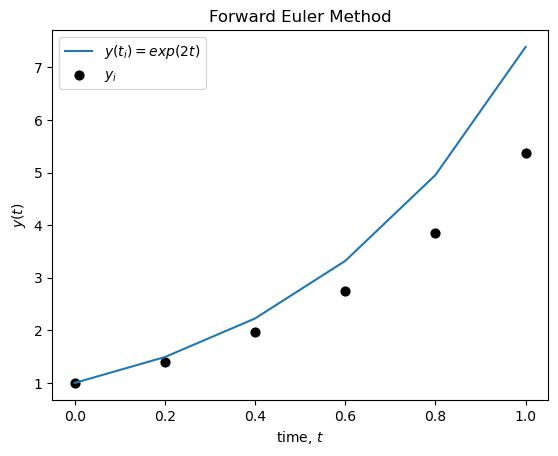

In [7]:
# Make a plot comparing the true solution and the FE approximate solution 

def true_soln(t): return exp(2*t)

plot(ti,true_soln(ti))
scatter(ti,yi,40,'k');
title('Forward Euler Method');
xlabel('time, $t$');
ylabel('$y(t)$');
legend(['$y(t_i)=exp(2t)$','$y_i$']);

savefig('FE_fig.pdf')

In [8]:
# its better to define a function to create the figure

def make_FE_fig1(ti,yi,true_soln):
    fig = figure(figsize=(6,4))
    plot(ti,true_soln(ti));
    scatter(ti,yi,40,'k');
    title('Forward Euler Method');
    xlabel('time, $t$');
    ylabel('$y(t)$');
    legend(['$y(t_i)=exp(2t)$','$y_i$']);
    

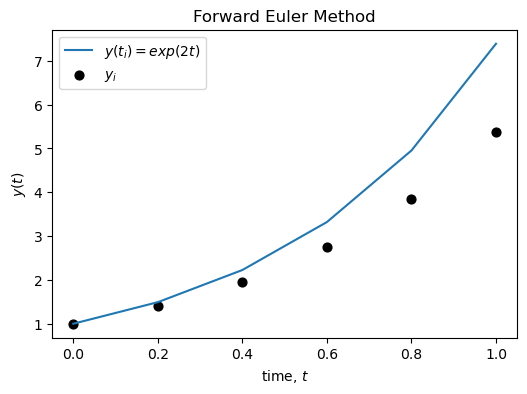

In [9]:
make_FE_fig1(ti,yi,true_soln)
savefig('FE_fig.pdf')

In [10]:
# It's better to create a general forward Euler function that takes as inputs:
# the time mesh ti = [t0,t1,...,tN], derivative function f = f(t,y), and initial condition y0

def forward_Euler(ti,f,y0): 
    
    h = ti[1]-ti[0]
    N = len(ti)-1
    yi = zeros(len(ti))
    yi[0] = y0
    for i in range(N):
        yi[i+1] = yi[i] + h*f(ti[i],yi[i])
    return yi

# this can solve any IVP using the Forward Euler method

In [11]:
def f(t,y): return 2*y
def true_soln(t): return exp(2*t)

t0 = 0
T = 1
N = 5
h = (T-t0)/N
ti = linspace(t0,T,N+1)

y0 = 1
yi = forward_Euler(ti,f,y0)
yi

array([1.     , 1.4    , 1.96   , 2.744  , 3.8416 , 5.37824])

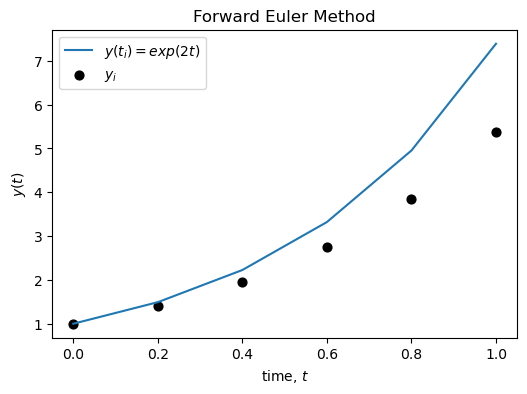

In [12]:
make_FE_fig1(ti,yi,true_soln)

In [13]:
# let's solve a different problem and compare to its known solution

def f(t,y): return -2*y
def true_soln(t): return exp(-2*t)

T = 1
N = 5
h = (T-t0)/N
ti = linspace(t0,T,N+1)

y0 = 1
yi = forward_Euler(ti,f,y0)
yi

array([1.     , 0.6    , 0.36   , 0.216  , 0.1296 , 0.07776])

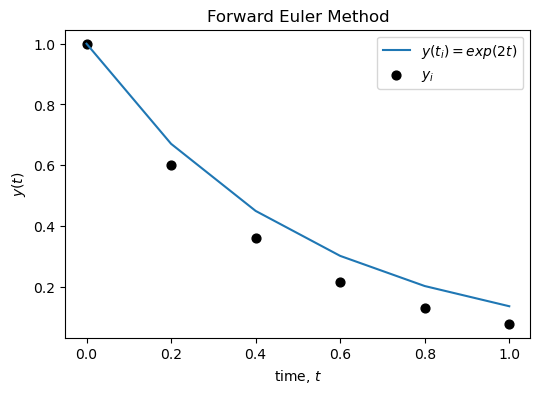

In [14]:
make_FE_fig1(ti,yi,true_soln)

## 2: Error Analysis for FE

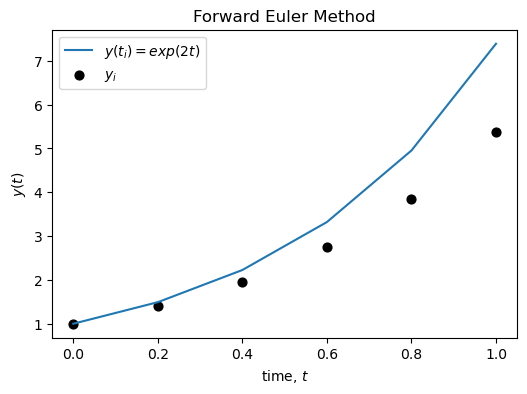

In [15]:
def f(t,y): return 2*y
def true_soln(t): return exp(2*t)

t0 = 0
T = 1
N = 5
h = (T-t0)/N
ti = linspace(t0,T,N+1)

y0 = 1
yi = forward_Euler(ti,f,y0)
make_FE_fig1(ti,yi,true_soln)

[0.         0.0918247  0.26554093 0.57611692 1.11143242 2.0108161 ]


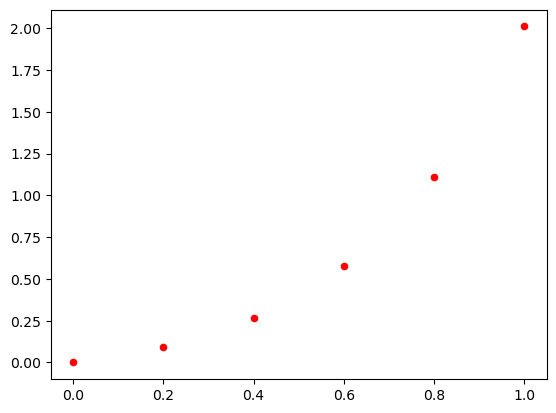

In [16]:
error = abs(yi - true_soln(ti))
print(error)
scatter(ti,error,20,'r');

In [17]:
def make_FE_fig2(ti,yi,true_soln,error_bound):
    
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    ax[0].plot(ti,true_soln(ti));
    ax[0].scatter(ti,yi,40,'k');
    ax[0].set_title('Forward Euler Method');
    ax[0].set_xlabel('time, $t$');
    ax[0].set_ylabel('$y(t)$');
    ax[0].legend(['$y(t_i)=exp(2t)$','$y_i$']);
    
    ax[1].scatter(ti,abs(true_soln(ti)-yi),40,'k');        
    ax[1].plot(ti,error_bound,'k:');
    ax[1].set_title('Local and Global Errors');
    ax[1].set_xlabel('time, $t$');
    ax[1].set_ylabel('$E_i = |y(t_i)-y_i|$');
    

In [18]:
L = 2 # Lipschitz constant 
M = 4*exp(2) # bounds second derivative of f with  respect to y
print('M =',M)
e1 = M*h**2/2
print('local error across 1 step, e1 =',e1)

i_vals = arange(N+1) # the sequence [0,1,2,..., N]
error_bounds = M*h/(2*L) * (exp(L*h*i_vals) - 1)

print(error_bounds)

M = 29.5562243957226
local error across 1 step, e1 = 0.5911244879144522
[0.         0.72682406 1.81111813 3.42869482 5.84183567 9.44181879]


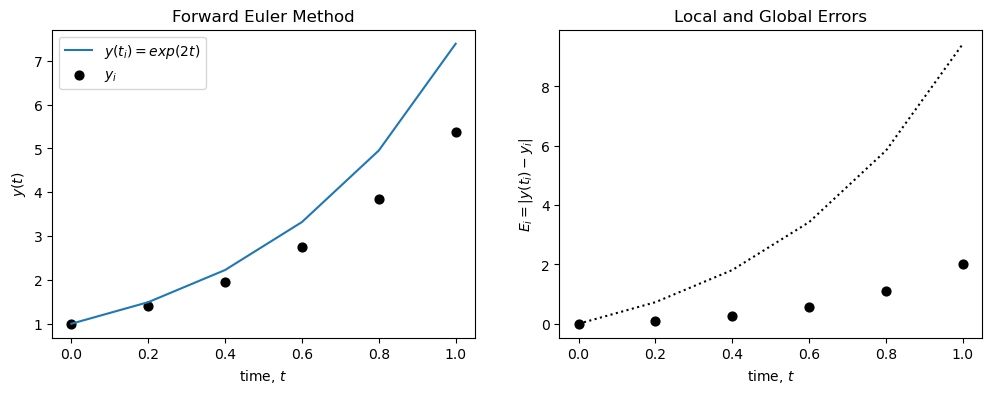

In [19]:
make_FE_fig2(ti,yi,true_soln,error_bounds)